In [44]:
import os
import numpy as np
import pandas as pd
from scipy.io import wavfile
import matplotlib.pyplot as plt

In [45]:
frame_duration = 1.0  # seconds
overlap = 0.5         # seconds

In [ ]:
def compute_energy(signal):
    """
    Calculates the total energy of a signal by computingW the sum of squared values.
    
    The energy of a discrete signal is defined as the sum of the absolute squares
    of its time-domain samples.
    
    Parameters:
        signal: Input signal array
    Returns:
        float: Total energy of the signal
    """
    return np.sum(signal.astype(float)**2)

In [ ]:
def is_microphone_active(energy, threshold):
    """
    Determines if a microphone is actively receiving audio input by comparing
    signal energy against a threshold value.

    Parameters:
        energy (float): The computed energy value of the audio signal
        threshold (float): The minimum energy value that indicates active audio

    Returns:
        bool: True if energy exceeds threshold (mic is active), False otherwise
    """
    return energy > threshold

In [ ]:
def to_mono(data):
    """
    Converts multi-channel audio data into mono (single channel) by averaging 
    across channels.

    Parameters:
        data (numpy.ndarray): Input audio data array. Can be mono (1D) or 
                            multi-channel (2D where axis 1 represents channels)

    Returns:
        numpy.ndarray: Mono audio data (1D array)

    Example:
        stereo_data = np.array([[1,2], [3,4]]) # 2 samples, 2 channels
        mono_data = to_mono(stereo_data) # Returns [1.5, 3.5]
    """
    if len(data.shape) > 1:
        data = np.mean(data, axis=1)  # Average across channels
    return data

In [49]:
def plot_energy_levels(energies):
    plt.figure(figsize=(10, 4))
    plt.plot(energies)
    plt.title('Energy Levels Over Time')
    plt.xlabel('Frame')
    plt.ylabel('Energy')
    plt.show()

In [ ]:
def process_audio_file(file_path, threshold):
    """
    Processes an audio file to detect periods of active audio input by analyzing 
    energy levels in short time frames.

    The function:
    1. Reads audio file and converts to mono
    2. Splits audio into overlapping frames
    3. Computes energy for each frame
    4. Determines if microphone is active based on energy threshold
    5. Creates DataFrame with timestamps and activity status
    6. Plots energy levels

    Parameters:
        file_path (str): Path to the audio file to process
        threshold (float): Energy threshold for determining active audio

    Returns:
        pandas.DataFrame: DataFrame with columns:
            - Timestamp: Time in seconds for each frame
            - MicrophoneActive: Binary indicator (1=active, 0=inactive)
        None: If file reading fails

    Dependencies:
        - scipy.io.wavfile for reading audio
        - numpy for numerical operations
        - pandas for DataFrame creation
    """

    # Read audio file
    try:
        sample_rate, data = wavfile.read(file_path)
    except Exception as e:
        print(f'Error reading {file_path}: {e}')
        return None

    # Convert to mono and setup frame parameters
    data = to_mono(data)
    total_duration = data.shape[0] / sample_rate
    frame_length = int(frame_duration * sample_rate)
    step_size = int((frame_duration - overlap) * sample_rate)
    num_frames = int(np.ceil((len(data) - frame_length) / step_size)) + 1

    # Initialize lists for storing results
    timestamps = []
    statuses = []
    energies = []

    # Process each frame
    for i in range(num_frames):
        # Extract frame
        start_idx = i * step_size
        end_idx = start_idx + frame_length
        frame = data[start_idx:end_idx]

        # Pad last frame if needed
        if len(frame) < frame_length:
            frame = np.pad(frame, (0, frame_length - len(frame)), 'constant')

        # Compute energy and check if active
        energy = compute_energy(frame)
        energies.append(energy)
        active = is_microphone_active(energy, threshold)

        # Store results
        timestamp = start_idx / sample_rate
        timestamps.append(timestamp)
        statuses.append(int(active))

    # Create DataFrame and plot results
    df = pd.DataFrame({'Timestamp': timestamps, 'MicrophoneActive': statuses})
    plot_energy_levels(energies)

    return df

In [ ]:
def process_all_files(data_folder, threshold):
    """
    Process all WAV files in a folder to detect microphone activity and save results to CSV.

    This function:
    1. Scans specified folder for .wav files
    2. Processes each WAV file using process_audio_file()
    3. Saves results as CSV with same base filename
    4. Prints status message for each processed file

    Parameters:
        data_folder (str): Path to folder containing WAV files
        threshold (float): Energy threshold for microphone activity detection

    Dependencies:
        - os for file operations
        - process_audio_file() for WAV processing
        - pandas for CSV export
    """
    for filename in os.listdir(data_folder):
        # Only process .wav files
        if filename.endswith('.wav'):
            # Construct full file paths
            file_path = os.path.join(data_folder, filename)
            df = process_audio_file(file_path, threshold)

            # Save results if processing successful
            if df is not None:
                base_filename = os.path.splitext(filename)[0]
                csv_filename = base_filename + '.csv'
                csv_path = os.path.join(data_folder, csv_filename)

                # Export to CSV and log
                df.to_csv(csv_path, index=False)
                print(f'Processed {filename} and saved to {csv_filename}')

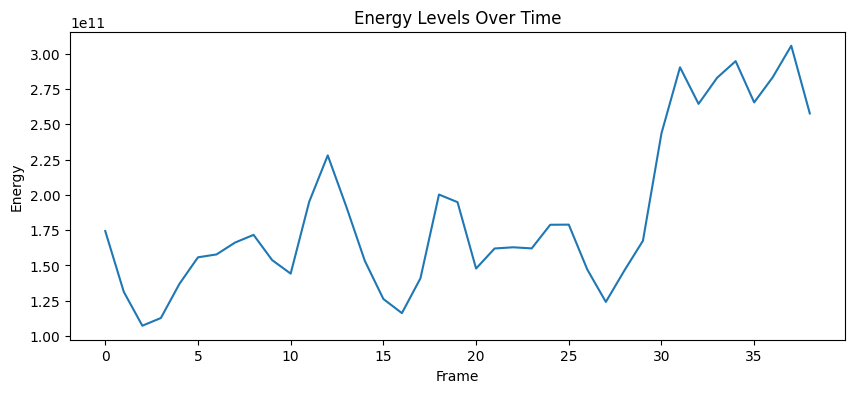

Processed 2024-08-10 23_29_47.024787Windrover.wav and saved to 2024-08-10 23_29_47.024787Windrover.csv


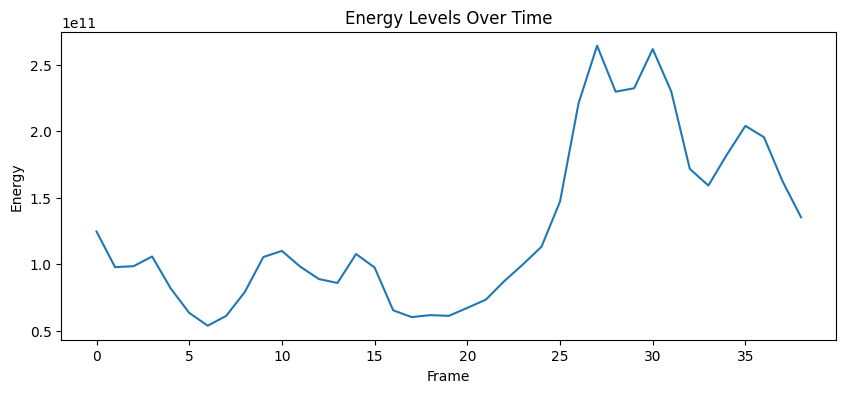

Processed 2024-08-09 18_29_53.104752Windrover.wav and saved to 2024-08-09 18_29_53.104752Windrover.csv


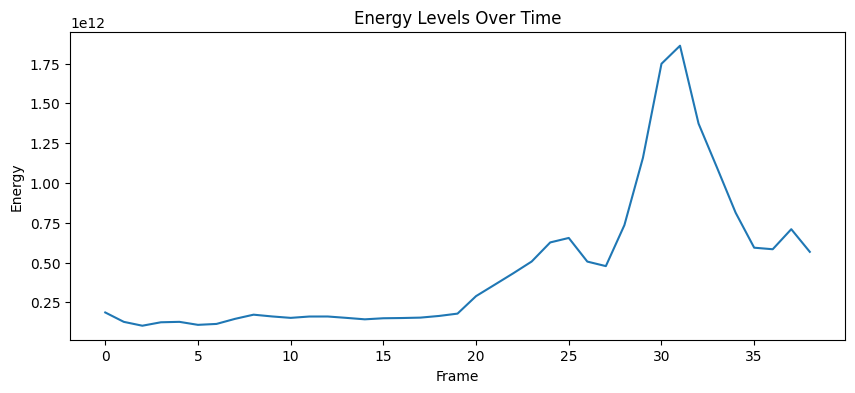

Processed 2024-08-12 10_29_37.962540Windrover.wav and saved to 2024-08-12 10_29_37.962540Windrover.csv


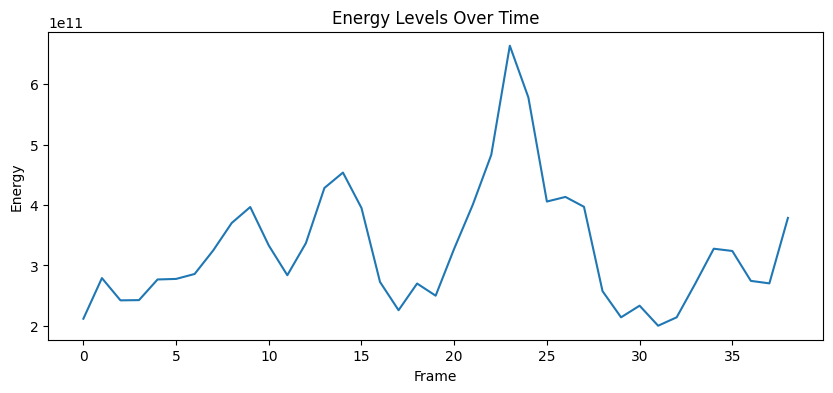

Processed 2024-08-14 05_29_28.678775Windrover.wav and saved to 2024-08-14 05_29_28.678775Windrover.csv


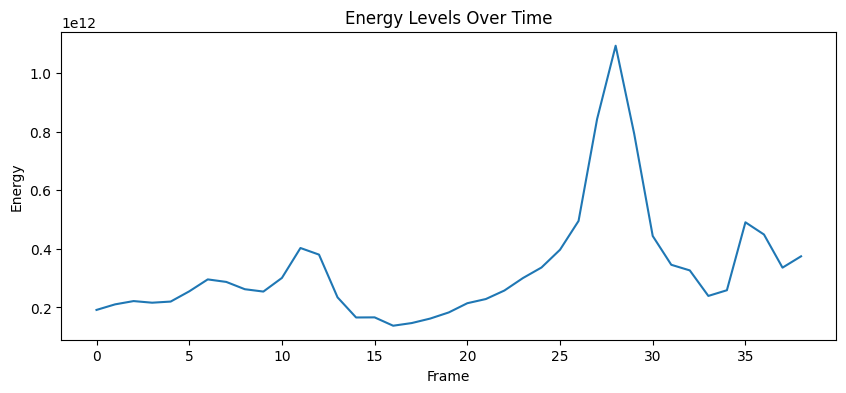

Processed 2024-08-18 11_29_09.902410Windrover.wav and saved to 2024-08-18 11_29_09.902410Windrover.csv


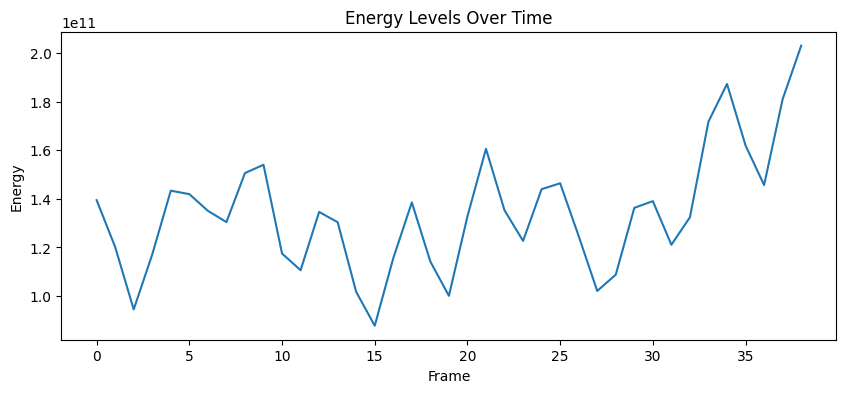

Processed 2024-08-16 05_29_18.099143Windrover.wav and saved to 2024-08-16 05_29_18.099143Windrover.csv


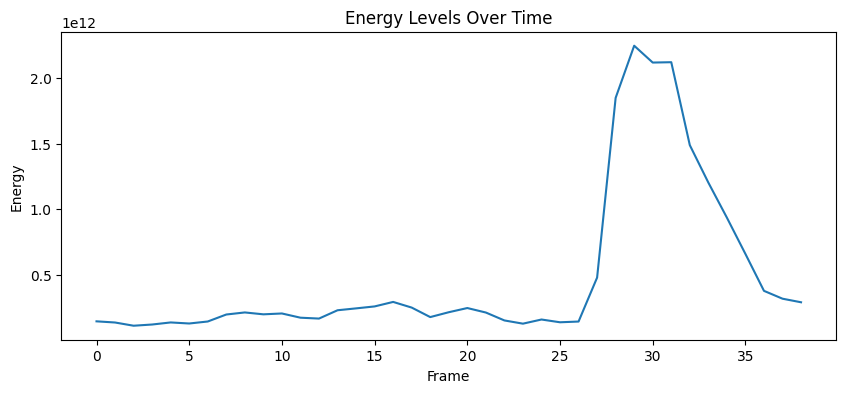

Processed 2024-08-17 06_29_11.364877Windrover.wav and saved to 2024-08-17 06_29_11.364877Windrover.csv


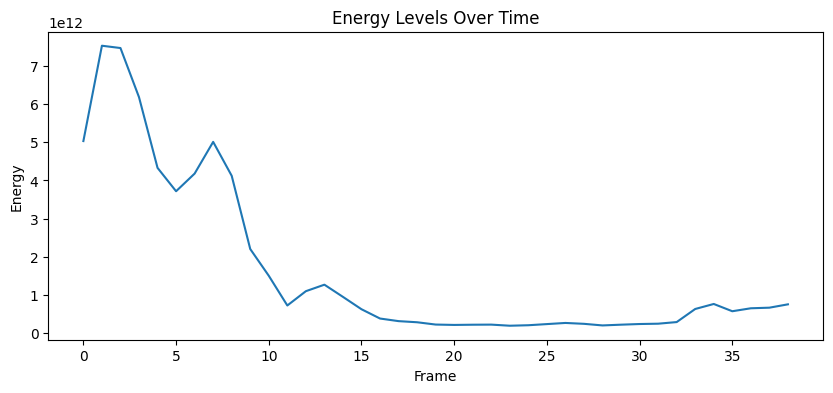

Processed 2024-08-11 16_29_47.761869Windrover.wav and saved to 2024-08-11 16_29_47.761869Windrover.csv


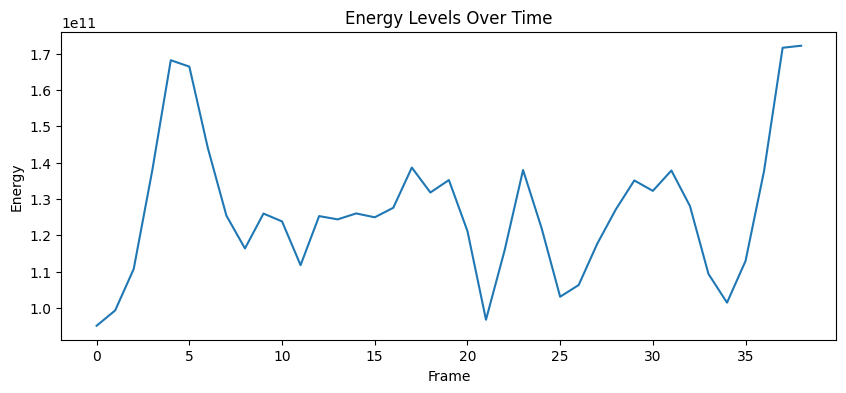

Processed 2024-08-09 01_30_01.803983Windrover.wav and saved to 2024-08-09 01_30_01.803983Windrover.csv


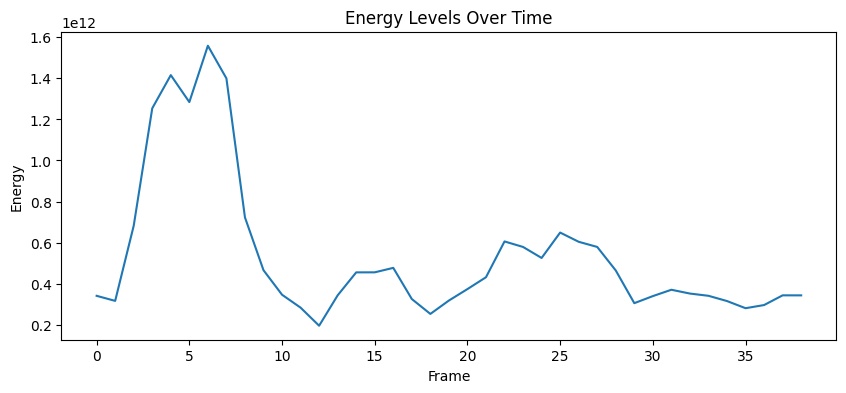

Processed 2024-08-14 20_29_25.255658Windrover.wav and saved to 2024-08-14 20_29_25.255658Windrover.csv


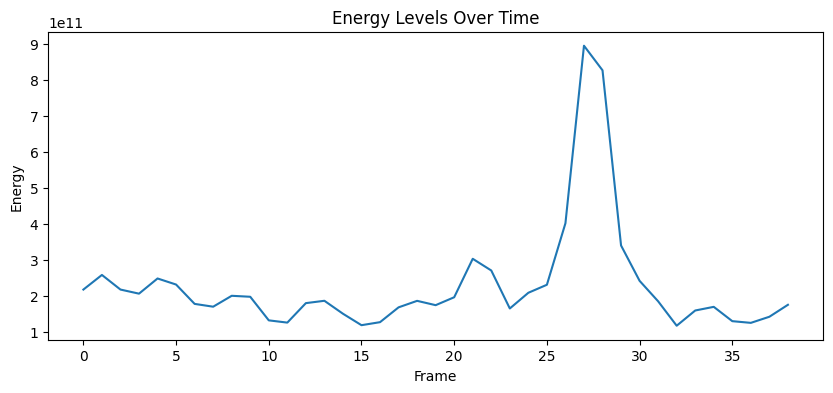

Processed 2024-08-13 12_29_32.111095Windrover.wav and saved to 2024-08-13 12_29_32.111095Windrover.csv


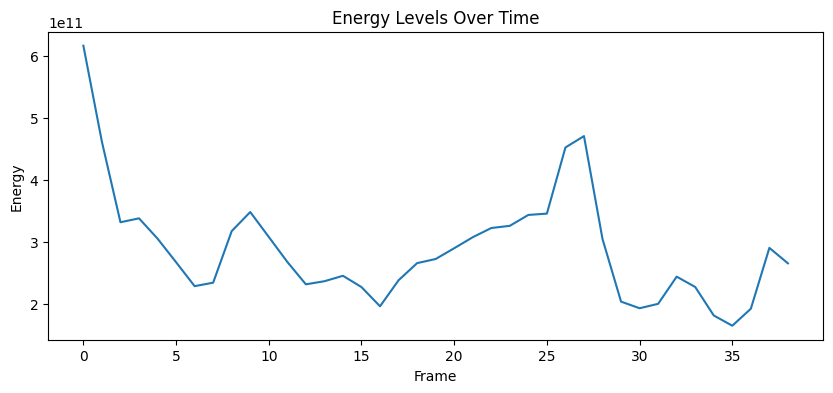

Processed 2024-08-15 09_29_21.566284Windrover.wav and saved to 2024-08-15 09_29_21.566284Windrover.csv


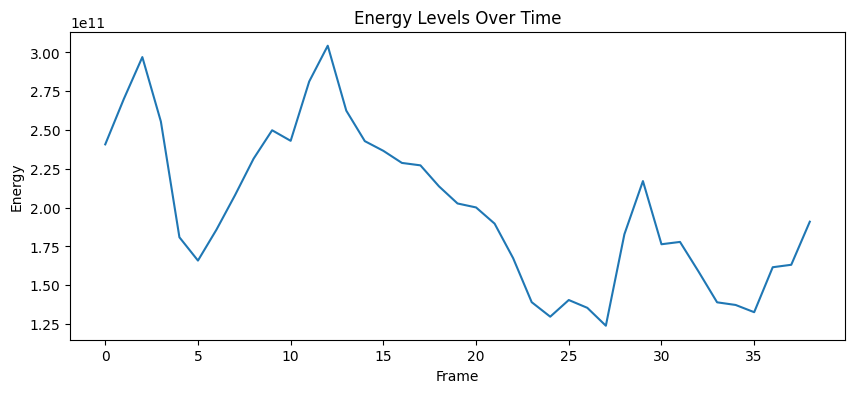

Processed 2024-08-08 06_30_33.899850Windrover.wav and saved to 2024-08-08 06_30_33.899850Windrover.csv


In [15]:
data_folder = '/home/hashim/learning-ai-with-baseer/internship/data'
threshold = 1000  # Adjust this threshold based on your data
process_all_files(data_folder, threshold)

In [23]:
import os
import csv
import webrtcvad
import wave
import contextlib
from pydub import AudioSegment

In [ ]:
def process_audio_file(file_path, vad_mode=1, frame_duration_ms=30, overlap_ms=10):
    """
    Processes an audio file using WebRTC Voice Activity Detection (VAD) to detect speech segments.

    Parameters:
        file_path (str): Path to the audio file to process
        vad_mode (int): WebRTC VAD aggressiveness mode (0-3, default=2)
        frame_duration_ms (int): Duration of each frame in milliseconds (default=30)
        overlap_ms (int): Overlap between consecutive frames in milliseconds (default=10)

    Returns:
        tuple: Two lists:
            - timestamps: Time in seconds for each frame
            - silence_flags: Binary indicators (1=speech, 0=silence)

    Processing steps:
    1. Load and normalize audio (mono, 16-bit PCM, 16kHz)
    2. Initialize WebRTC VAD
    3. Process audio in overlapping frames
    4. Detect speech in each frame
    5. Return timestamps and speech detection results

    Dependencies:
        - pydub.AudioSegment for audio file handling
        - webrtcvad for voice activity detection
    """
    audio = AudioSegment.from_file(file_path)
    audio = audio.set_channels(1)          # Mono
    audio = audio.set_sample_width(2)      # 16-bit PCM
    audio = audio.set_frame_rate(16000)    # Sample rate
    audio_samples = audio.raw_data
    sample_rate = audio.frame_rate
    sample_width = audio.sample_width

    vad = webrtcvad.Vad(vad_mode)

    bytes_per_sample = sample_width
    frame_size = int(sample_rate * frame_duration_ms / 1000) * bytes_per_sample
    step_size = int(sample_rate * (frame_duration_ms - overlap_ms) / 1000) * bytes_per_sample

    total_frames = int((len(audio_samples) - frame_size) / step_size) + 1

    timestamps = []
    silence_flags = []

    for i in range(total_frames):
        offset = i * step_size
        frame = audio_samples[offset:offset + frame_size]

        if len(frame) < frame_size:
            frame = frame.ljust(frame_size, b'\0')

        is_speech = vad.is_speech(frame, sample_rate)
        silence_detected = 1 if is_speech else 0

        timestamp = (offset / bytes_per_sample) / sample_rate

        timestamps.append(timestamp)
        silence_flags.append(silence_detected)

    return timestamps, silence_flags


In [58]:
def process_all_files(data_folder, output_folder):
    """
    Process all WAV files in a folder using WebRTC VAD and save results as CSVs.

    Parameters:
        data_folder (str): Path to folder containing WAV files
        output_folder (str): Path to folder where CSV files will be saved

    Processing steps:
    1. Scan input folder for WAV files
    2. Process each WAV file using WebRTC VAD
    3. Create CSV with timestamps and speech detection results
    4. Save CSV to output folder with matching filename
    5. Handle errors and provide progress feedback

    Dependencies:
        - os for file operations
        - csv for writing results
        - process_audio_file() for VAD processing
    """
    for filename in os.listdir(data_folder):
        if filename.endswith('.wav'):
            file_path = os.path.join(data_folder, filename)
            print(f"Processing {filename}...")
            try:
                timestamps, silence_flags = process_audio_file(file_path)
                # Prepare CSV content
                csv_content = [['Timestamp', 'SilenceDetected']]
                csv_content.extend(zip(timestamps, silence_flags))
                # Write to CSV
                base_filename = os.path.splitext(filename)[0]
                csv_filename = base_filename + '.csv'
                csv_path = os.path.join(output_folder, csv_filename)
                with open(csv_path, 'w', newline='') as csvfile:
                    writer = csv.writer(csvfile)
                    writer.writerows(csv_content)
                print(f"Result saved to {csv_filename}")
            except Exception as e:
                print(f"Error processing {filename}: {e}")


In [59]:
if __name__ == '__main__':
    data_folder = '/home/hashim/learning-ai-with-baseer/internship/data/audio'     
    output_folder = '/home/hashim/learning-ai-with-baseer/internship/data/vad'       
    os.makedirs(output_folder, exist_ok=True)   
    process_all_files(data_folder, output_folder)


Processing 2024-08-10 23_29_47.024787Windrover.wav...
Result saved to 2024-08-10 23_29_47.024787Windrover.csv
Processing 2024-08-09 18_29_53.104752Windrover.wav...
Result saved to 2024-08-09 18_29_53.104752Windrover.csv
Processing 2024-08-12 10_29_37.962540Windrover.wav...
Result saved to 2024-08-12 10_29_37.962540Windrover.csv
Processing 2024-08-14 05_29_28.678775Windrover.wav...
Result saved to 2024-08-14 05_29_28.678775Windrover.csv
Processing 2024-08-18 11_29_09.902410Windrover.wav...
Result saved to 2024-08-18 11_29_09.902410Windrover.csv
Processing 2024-08-16 05_29_18.099143Windrover.wav...
Result saved to 2024-08-16 05_29_18.099143Windrover.csv
Processing 2024-08-17 06_29_11.364877Windrover.wav...
Result saved to 2024-08-17 06_29_11.364877Windrover.csv
Processing 2024-08-11 16_29_47.761869Windrover.wav...
Result saved to 2024-08-11 16_29_47.761869Windrover.csv
Processing 2024-08-09 01_30_01.803983Windrover.wav...
Result saved to 2024-08-09 01_30_01.803983Windrover.csv
Processing

In [82]:
import os
import numpy as np
import csv
from scipy.io import wavfile

In [83]:
def load_audio_file(file_path):
    try:
        sample_rate, data = wavfile.read(file_path)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None, None
    if data.dtype != np.float32:
        data = data.astype(np.float32)
    if len(data.shape) > 1:
        data = np.mean(data, axis=1)
    max_val = np.max(np.abs(data))
    if max_val > 0:
        data = data / max_val
    return sample_rate, data

In [84]:
def compute_spectral_energy(signal, sample_rate):
    fft_spectrum = np.fft.rfft(signal)
    magnitude_spectrum = np.abs(fft_spectrum)
    spectral_energy = magnitude_spectrum ** 2
    total_energy = np.sum(spectral_energy)
    return total_energy

In [ ]:
def is_silence(spectral_energy, threshold_db):
    """
    Determines if the spectral energy indicates silence, based on a threshold in dB.

    Parameters:
        spectral_energy (float): Total spectral energy of the signal.
        threshold_db (float): Energy threshold in decibels (dB).

    Returns:
        bool: True if silence is detected, False otherwise.
    """
    # Convert threshold from dB to linear scale
    threshold = 10 ** (threshold_db / 20)
    return spectral_energy < threshold


In [86]:
def segment_signal(signal, sample_rate, frame_duration, overlap):
    frame_length = int(frame_duration * sample_rate)
    step_size = int((frame_duration - overlap) * sample_rate)
    total_samples = len(signal)
    segments = []
    for start in range(0, total_samples - frame_length + 1, step_size):
        end = start + frame_length
        segment = signal[start:end]
        segments.append(segment)
    # Handle the last segment
    if total_samples % step_size != 0 and total_samples > frame_length:
        segment = signal[-frame_length:]
        segments.append(segment)
    return segments

In [87]:
def process_audio_files(data_folder, output_folder, threshold, frame_duration=0.5, overlap=0.25):
    """
    Processes all .wav files in the data folder, segments them, and determines if any segment contains silence.
    Saves the results in CSV files in the output folder.

    Parameters:
        data_folder (str): Path to the folder containing .wav files.
        output_folder (str): Path to the folder where CSV files will be saved.
        threshold (float): Energy threshold for silence detection.
        frame_duration (float): Duration of each frame in seconds.
        overlap (float): Overlap duration between frames in seconds.

    Returns:
        results (list): List of tuples containing filename and classification.
    """
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    results = []
    for filename in os.listdir(data_folder):
        if filename.endswith('.wav'):
            file_path = os.path.join(data_folder, filename)
            print(f"Processing {filename}...")
            sample_rate, signal = load_audio_file(file_path)
            if signal is None:
                continue
            segments = segment_signal(signal, sample_rate, frame_duration, overlap)
            segment_classifications = []
            silence_segments = []
            csv_rows = []
            for i, segment in enumerate(segments):
                spectral_energy = compute_spectral_energy(segment, sample_rate)
                silence_detected = is_silence(spectral_energy, threshold)
                segment_classifications.append(silence_detected)
                start_time = i * (frame_duration - overlap)
                end_time = start_time + frame_duration
                # Append data to CSV rows
                csv_rows.append({
                    'Segment': i + 1,
                    'Start_Time': start_time,
                    'End_Time': end_time,
                    'Spectral_Energy': spectral_energy,
                    'Silence_Detected': silence_detected
                })
                if silence_detected:
                    silence_segments.append((start_time, end_time))
            if silence_segments:
                classification = 'Contains Silence'
            else:
                classification = 'No Silence Detected'
            results.append((filename, classification, silence_segments))
            print(f"  - File Classification: {classification}")
            if silence_segments:
                print(f"  - Silence Segments: {silence_segments}\n")
            else:
                print()

            # Save the results to a CSV file
            base_filename = os.path.splitext(filename)[0]
            csv_filename = base_filename + '.csv'
            csv_path = os.path.join(output_folder, csv_filename)
            with open(csv_path, 'w', newline='') as csvfile:
                fieldnames = ['Segment', 'Start_Time', 'End_Time', 'Spectral_Energy', 'Silence_Detected']
                writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
                writer.writeheader()
                for row in csv_rows:
                    writer.writerow(row)
            print(f"Results saved to {csv_filename}\n")
    return results

In [88]:
if __name__ == '__main__':
    data_folder = '/home/hashim/learning-ai-with-baseer/internship/data/audio'       # Replace with your actual data folder path
    output_folder = '/home/hashim/learning-ai-with-baseer/internship/data/fft'   # Replace with your desired output folder path
    threshold = -90  
    frame_duration = 0.5  
    overlap = 0.25       

    results = process_audio_files(data_folder, output_folder, threshold, frame_duration, overlap)

    # Output the results
    print("\nSummary of Results:")
    for filename, classification, silence_segments in results:
        print(f"{filename}: {classification}")
        if silence_segments:
            print(f"  Silence Segments: {silence_segments}")

Processing 2024-08-10 23_29_47.024787Windrover.wav...
  - File Classification: No Silence Detected

Results saved to 2024-08-10 23_29_47.024787Windrover.csv

Processing 2024-08-09 18_29_53.104752Windrover.wav...
  - File Classification: No Silence Detected

Results saved to 2024-08-09 18_29_53.104752Windrover.csv

Processing 2024-08-12 10_29_37.962540Windrover.wav...
  - File Classification: No Silence Detected

Results saved to 2024-08-12 10_29_37.962540Windrover.csv

Processing 2024-08-14 05_29_28.678775Windrover.wav...
  - File Classification: No Silence Detected

Results saved to 2024-08-14 05_29_28.678775Windrover.csv

Processing 2024-08-18 11_29_09.902410Windrover.wav...
  - File Classification: No Silence Detected

Results saved to 2024-08-18 11_29_09.902410Windrover.csv

Processing 2024-08-16 05_29_18.099143Windrover.wav...
  - File Classification: No Silence Detected

Results saved to 2024-08-16 05_29_18.099143Windrover.csv

Processing 2024-08-17 06_29_11.364877Windrover.wav..